In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('resources/data/heart-disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.shape

(303, 14)

In [4]:
df = data.copy()

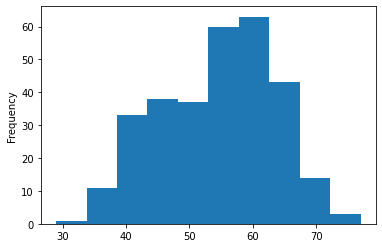

In [5]:
df.age.plot(kind='hist');

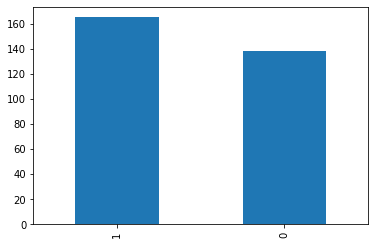

In [6]:
df.target.value_counts().plot(kind='bar');

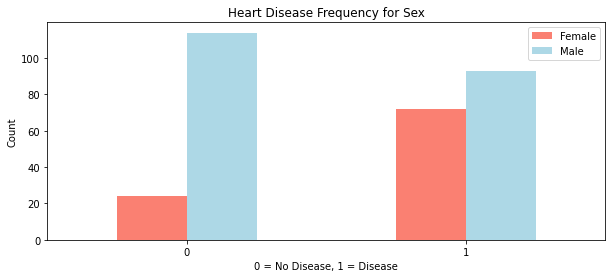

In [7]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 4),
                                   color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

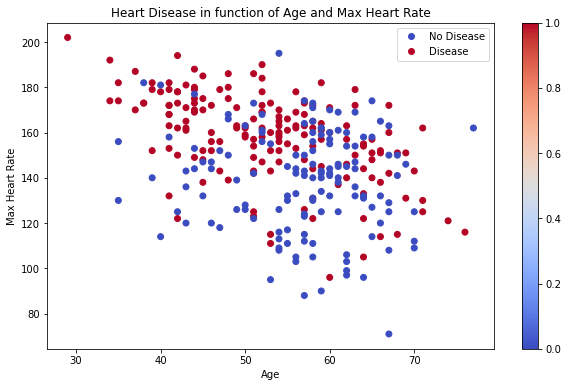

In [8]:
plt.figure(figsize=(10, 6))
# Scatter plot with both positive and negative examples
scatter = plt.scatter(df.age, df.thalach, c=df.target, cmap='coolwarm')
# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.colorbar(scatter)
plt.legend(handles=scatter.legend_elements()[0], labels=['No Disease', 'Disease']);

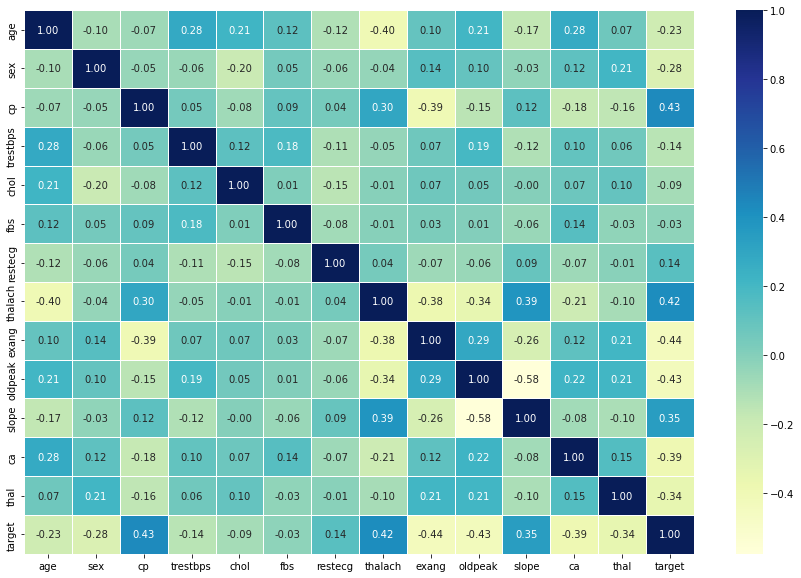

In [9]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## AutoLog The Experiment

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# from pickle import dump
import mlflow

mlflow.autolog()

# Split data into x and y
X = df.drop('target', axis=1)
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

# create a scaler object
scaler = StandardScaler()

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                                columns = X_train.columns,
                                index = X_train.index)


# Scale the X_test
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                               columns = X_test.columns,
                               index = X_test.index)

## Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_rescaled, y_train)

y_test_pred = rf_classifier.predict(X_test_rescaled)
rf_acc = accuracy_score(y_test, y_test_pred)

2023/05/07 09:09:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/05/07 09:09:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/05/07 09:09:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bf45b71f541b4465b896050831d32bbb', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


In [12]:
from sklearn.model_selection import GridSearchCV

# Enabling automatic MLflow logging for scikit-learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():

    # Define the hyperparameters grid to search over
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    # Create a Random Forest classifier and perform a grid search over the hyperparameters
    rf = RandomForestClassifier(random_state=42)
    clf = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True, verbose=1)
    clf.fit(X_train, y_train)
    
    # Disabiling autologging
    mlflow.sklearn.autolog(disable=True)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


2023/05/07 10:44:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\mlflow\models\signature.py:137: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
